<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/Modul_4_Sesi_3_Data_preprocesing_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library yang dibutuhkan

Dataset:

https://drive.google.com/drive/folders/1dfHoIfZVplVKPvC3Ip1SeYRSKIyNwSsN?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# mathplotlib merupakan library untuk membuat grafik.

In [ ]:
# code ini untuk menghilangkan warning message saat kita menjalankan code-code
# kita di bawah
import warnings
warnings.filterwarnings('ignore')

## Eksplorasi Data awal

In [ ]:
# Load data kita ke sebuah dataframe bernama data
data = pd.read_csv("credit_scoring.csv")

# menggunakan method csv dari pandas

In [ ]:
# tampilkan jumlah baris dan data
data.shape

# shape itu menghasilkan data tuple

(21525, 12)

In [ ]:
# tampilkan 10 baris pertama
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


## 2. Pengecekan missing value

In [ ]:
# lihat informasi dari data kita
data.info()

# akan menghasilkan summary dari data kita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Terdapat 2 kolom yang memiliki missing values. Kita akan investigasi lebih lanjut

In [ ]:
# hitung jumlah missing value di tiap kolom
data.isna() .sum()

# isna itu memfilter data/mengambil data yang nilainya null.
# .sum itu untuk mengambil jumlah bari sata tiap kolom

,0
children,0
days_employed,2174
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


In [ ]:
data.sum()
# menjumlahkan datanya

,0
children,11600
days_employed,1220012776.247171
dob_years,931890
education,bachelor's degreesecondary educationSecondary ...
education_id,17591
family_status,marriedmarriedmarriedmarriedcivil partnershipc...
family_status_id,20934
gender,FFMMFMFMFMMFMFFFFMFFMFFMFMMMFFFFFFFMMFMFMFFFFF...
income_type,employeeemployeeemployeeemployeeretireebusines...
debt,1741


In [ ]:
# hitung proporsi missing value di tiap kolom
data.isna().sum()/data.shape[0] * 100
# dikali 100 agar jadi persen

# shape[0] untuk mengambil jumlah baris

,0
children,0.000000
days_employed,10.099884
dob_years,0.000000
education,0.000000
education_id,0.000000
family_status,0.000000
family_status_id,0.000000
gender,0.000000
income_type,0.000000
debt,0.000000


In [ ]:
# hitung proporsi juga bisa jadi mean
data.isna().mean()

# menghitung jumlah baris/total baris keseluruhan

,0
children,0.000000
days_employed,0.100999
dob_years,0.000000
education,0.000000
education_id,0.000000
family_status,0.000000
family_status_id,0.000000
gender,0.000000
income_type,0.000000
debt,0.000000


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom
data[data['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Sepertinya ketika days_employed nilainya null, di kolom total_income juga nilainya akan null. Mari kita pastikan hal ini terlebih dahulu

In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di kedua kolom sekaligus
data[(data['days_employed'].isna()) & (data['total_income'].isna())].shape

(2174, 12)

Jumlah missing value saat kita filter berdasarkan kedua kolom yang memiliki missing value ternyata sama dengan jumlah baris yang memiliki missing value. Artinya saat value di days_employed = Nan, maka value di total_income juga akan Nan.

Jumlah missing data di dataset kita ada sekitar 10 %, sehingga jika kita menghapus semua baris yang memiliki missing value, dapat merubah distribusi dari data kita dan mendistorsi analisa lebih lanjut. Untuk itu kita akan menggunakan metode imputasi data untuk mengatasi missing value. Hal ini akan kita lakukan di bagian imputasi missing value

## Pembersihan Data

### Pengecekan duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
data.duplicated().sum()

54

In [ ]:
# hapus data duplikat
data = data.drop_duplicates(inplace=True)

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)
# reset indeks nanti mereset indexnya

In [ ]:
data.drop_duplicates().reset_index(drop=True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21467,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21468,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21469,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [ ]:
# cek apakah kita sudah berhasil menghapus data duplikat


Terdapat 0 baris duplikat di data kita


### Pengecekan kolom *education*

In [ ]:
# mari kita lihat isi dari kolom education
data["education"].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [ ]:
# mari kita lihat isi dari kolom education
data['education'].value_counts()

,count
education,
secondary education,13750
bachelor's degree,4718
SECONDARY EDUCATION,772
Secondary Education,711
some college,668
BACHELOR'S DEGREE,274
Bachelor's Degree,268
primary education,250
Some College,47


In [ ]:
# mari kita samakan value di kolom education menjadi lowercase
data['education'] = data['education'].str.lower()

In [ ]:
# lakukan pengecekan kembali ke kolom education
data['education'].value_counts()

,count
education,
secondary education,15233
bachelor's degree,5260
some college,744
primary education,282
graduate degree,6


### Pengecekan kolom *children*

In [ ]:
# kita lihat distribusi data di kolom kategorik children
data['children'].value_counts()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# mari kita lihat persentasenya
data['children'].value_counts(normalize=True)*100

persentase distribusi data di kolom children :


 0     65.702576
 1     22.397653
 2      9.557077
 3      1.536957
 20     0.353966
-1      0.218900
 4      0.190955
 5      0.041917
Name: children, dtype: float64

Terdapat beberapa nilai yang aneh di sini. Kita punya beberapa opsi di sini :


1.   Kita bisa hapus baris - baris data yang nilai di kolom childrennya aneh, karena jumlahnya cukup kecil (kurang dari 1%)
2.   Atau kita bisa nilai tersebut dengan nilai lain

Kita akan coba gunakan keduanya pada value yang berbeda


In [ ]:
# Kita cek jumlah baris data kita terlebih dahulu
data.shape[0]

Jumlah baris data kita sekarang adalah 21471


In [ ]:
# drop / hapus baris yang nilai childrennya negatif
data = data.drop(data[data['children'] == -1].index)

Jumlah baris data kita sekarang setelah transformasi adalah 21424


In [ ]:
# kita dapat berasumsi bahwa terdapat typo saat data children di input
# dimana terdapat ekstra angka 0 di belakang (misal 2 menjadi 20)
# mari kita replace angka tersebut
data['children'] = data['children'].replace(20, 2)

In [ ]:
# kita cek lagi data di kolom children


0    14107
1     4809
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

data sudah terlihat lebih normal sekarang

### Pengecekan kolom *days_employed*

Selain missing values, terdapat keanehan lain di kolom days_employed dimana terdapat nilai negatif. Hal ini tidak wajar karena jumlah hari seseorang bekerja seharusnya tidak bisa negatif. Mari kita atasi hal ini

In [ ]:
# pertama kita cek dulu ada berapa banyak kasus ini
print('JUmlah baris data employes negatif ;', data[data['days_employed'] < 0]. shape(0))
print('JUmlah baris data employes negatif ;', data[data['days_employed'] < 0]. shape(0))

Jumlah baris dengan data days_employed negatif : 15869
% baris dengan data days_employed negatif : 74.07%


In [ ]:
data['days_employed'].head()

,days_employed
0,-8437.673028
1,-4024.803754
2,-5623.422610
3,-4124.747207
4,340266.072047


In [ ]:
# mari kita ubah nilai negatif menjadi nilai positif


In [ ]:
# kita cek apakah transformasi kita sudah berhasil


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


### Pengecekan kolom umur pelanggan (*dob_years*)

In [ ]:
# Mari kita urutkan nilai unik di kolom dob_years

data['dob_years'].value_counts()

,count
dob_years,
35,617
40,609
41,607
34,603
38,598
42,597
33,581
39,573
31,560


In [ ]:
data['dob_years'].value_counts().sort_index().head(10)

,count
dob_years,
0,101
19,14
20,51
21,111
22,183
23,254
24,264
25,357
26,408


In [ ]:
# terdapat beberapa pelanggan yang umurnya 0. Mari kita hapus saja baris
# data tersebut
data = data.drop(data[data['dob_years'] == 0].index)

In [ ]:
# Kita cek kembali hasil transformasi kita
data['dob_years'].value_counts().sort_index().head(10)


,count
dob_years,
19,14
20,51
21,111
22,183
23,254
24,264
25,357
26,408
27,493


### Pengecekan kolom *gender*


In [ ]:
# mari kita lihat kolom gender
data['gender'].value_counts()

,count
gender,
F,14164
M,7259
XNA,1


In [ ]:
# mari kita hapus baris data yang nilainya XNA


In [ ]:
# kita perikasa hasilnya


F    14082
M     7240
Name: gender, dtype: int64

## Imputasi / Mengisi missing values

In [ ]:
# tapi sebelumnya kita coba cek terlebih dahulu distribusi data tiap kolom

[]

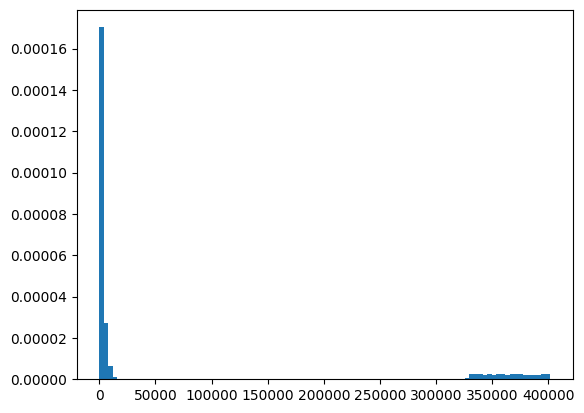

In [ ]:
# plot histogram days_employed


[]

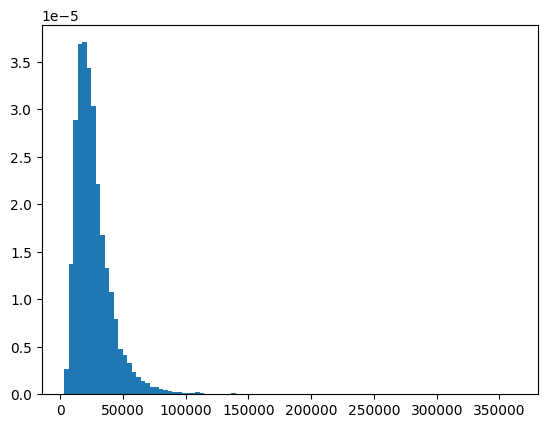

In [ ]:
# plot histogram total_income


Terlihat bahwa histogram keduanya memiliki skewness yang positif atau terdapat extreme values/outlier . Artinya kita perlu juga nanti mengatasi outlier di keduanya. Namun untuk saat ini, mari kita isi missing value di kolom *days_employed* dan *total_income* menggunakan median dari kedua kolom tersebut

In [ ]:
# simpan nilai median kedua kolom secara terpisah


Nilai median untuk kolom days_employed : 2195.688841518035
Nilai median untuk kolom total_income : 23200.877


In [ ]:
# kita lakukan imputasi


In [ ]:
# mari kita cek jumlah missing value


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

## Mengatasi outlier

Kita akan gunakan metoda IQR untuk mencek nilai2 outlier di data kita, untuk kolom days_employed dan kolom total_income. Untuk mempermudah analisis dan pengerjaan, kita akan buat suatu fungsi yang dapat menerima input nama kolom dan juga apakah kita mau menghitung *upper bound* ataupun *lower bound*

In [ ]:
# membuat fungsi cek outlier. Lengkapi bagian ... !
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = ...

  if batas == 'upper_bound':
      bound = ...
  elif batas == 'lower_bound':
      bound = ...
  return list(bound[0])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom total_income. Lengkapi bagian ... !
upper_total_income = ...
lower_total_income = ...
print(f"Jumlah total outlier di kolom total income : {len(upper_total_income) + len(lower_total_income)}")

Jumlah total outlier di kolom total income : 1119


In [ ]:
# kolom days_employed. Lengkapi bagian ... !
upper_days_employed = ...
lower_days_employed = ...
print(f"Jumlah total outlier di kolom days_employed: {len(upper_days_employed) + len(lower_days_employed)}")

Jumlah total outlier di kolom days_employed: 3638


In [ ]:
# mari kita buat sebuah fungsi yang dapat menerima input sebuah data frame
# dan juga nama kolom untuk filter / menghapus data outlier
def filter_outlier(df, nama_kolom):
    if nama_kolom == 'total_income':
        data_temp = df.loc[~df.index.isin(upper_total_income)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_total_income)]
        return data_temp
    if nama_kolom == 'days_employed':
        data_temp = df.loc[~df.index.isin(upper_days_employed)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_days_employed)]
        return data_temp


In [ ]:
# buat dataframe baru dengan memanggil fungsi filter_outlier
data1 = filter_outlier(..., ...)
print(data1.shape)

(20213, 12)


In [ ]:
# buat dataframe baru dengan memanggil fungsi filter_outlier, menggunakan
# dataframe data1 di atas
data2 = filter_outlier(..., ...)
print(data2.shape)

(16709, 12)


In [ ]:
# final data
data2.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate
